In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import io

In [2]:
df = pd.read_csv('CVD_cleaned.csv')

In [3]:
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


In [4]:
df.shape

(29917, 19)

In [5]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [6]:
df.isna().sum() #no null values

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             1
Smoking_History                 1
Alcohol_Consumption             1
Fruit_Consumption               1
Green_Vegetables_Consumption    1
FriedPotato_Consumption         1
dtype: int64

In [7]:
null_num_columns = ['Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for col in null_num_columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [8]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [9]:
df['Heart_Disease'].value_counts()

Heart_Disease
No     27508
Yes     2409
Name: count, dtype: int64

In [10]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

columns_to_encode = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History']

for col in columns_to_encode:
  df[col] = labelencoder.fit_transform(df[col])

In [12]:
df.dtypes

General_Health                    int64
Checkup                           int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [13]:
df['Heart_Disease'].value_counts()

Heart_Disease
0    27508
1     2409
Name: count, dtype: int64

<Axes: >

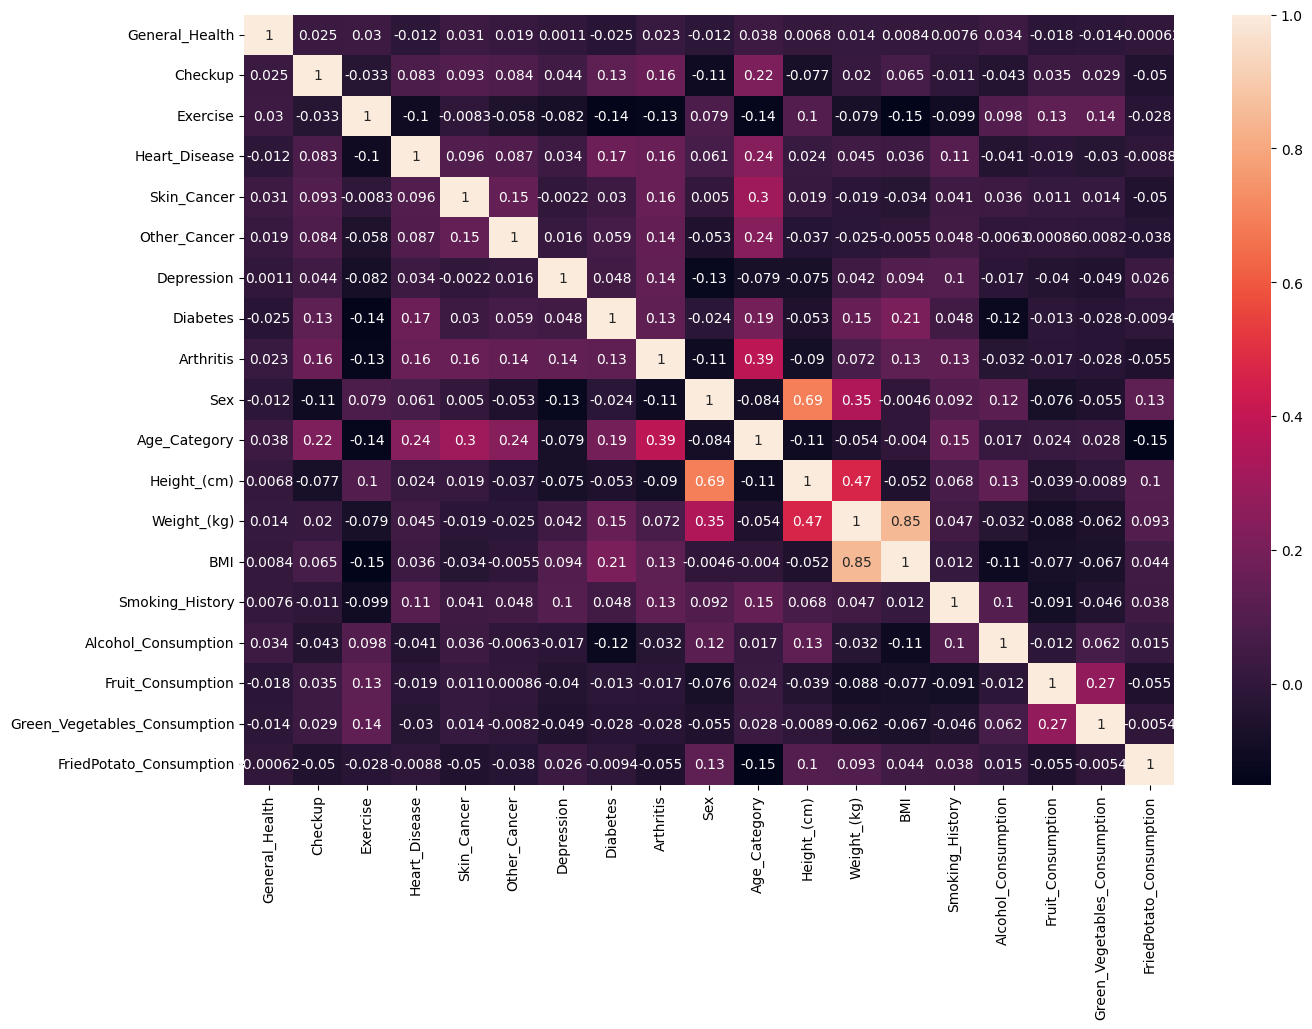

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [58]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,train_size=0.80)

In [59]:
X_train = train.drop(['Heart_Disease'],axis=1)
y_train = train['Heart_Disease']
X_test = test.drop(['Heart_Disease'],axis=1)
y_test = test['Heart_Disease']

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [61]:
model = RandomForestClassifier(n_estimators=150)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [62]:
model.score(X_test, y_test)

0.9239639037433155

In [63]:
y_pred = model.predict(X_test)

In [64]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5523,    2],
       [ 453,    6]])

Text(95.72222222222221, 0.5, 'Truth')

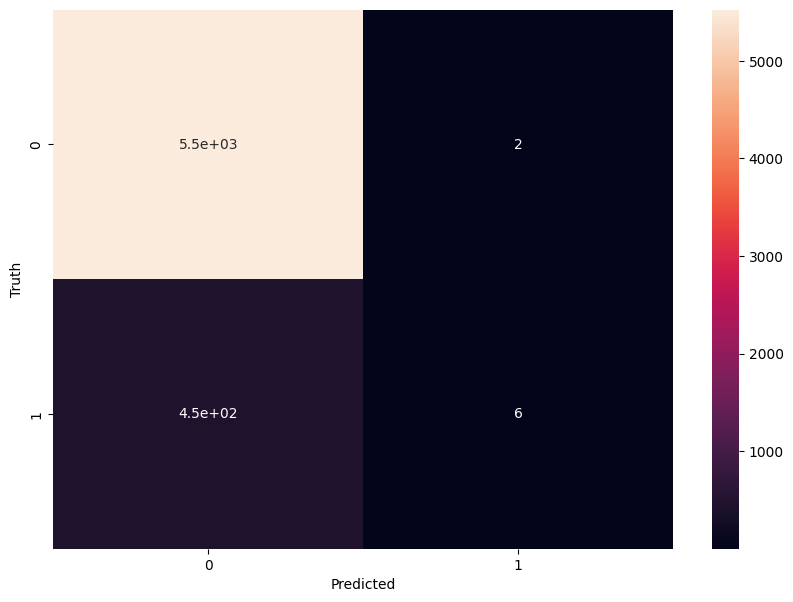

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
score = accuracy_score(y_test,y_pred)*100
acc = round(score,2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy:',acc, '%,',corr, 'correct detections')
print('Inaccuracy:',inac, '%',len(test)-corr, 'incorrect detections')

Accuracy: 92.4 %, 5529.0 correct detections
Inaccuracy: 7.6 % 455.0 incorrect detections


In [67]:
df.loc[0]

General_Health                    3.00
Checkup                           2.00
Exercise                          0.00
Heart_Disease                     0.00
Skin_Cancer                       0.00
Other_Cancer                      0.00
Depression                        0.00
Diabetes                          0.00
Arthritis                         1.00
Sex                               0.00
Age_Category                     10.00
Height_(cm)                     150.00
Weight_(kg)                      32.66
BMI                              14.54
Smoking_History                   1.00
Alcohol_Consumption               0.00
Fruit_Consumption                30.00
Green_Vegetables_Consumption     16.00
FriedPotato_Consumption          12.00
Name: 0, dtype: float64

In [68]:
input_data = (3, 2, 0, 0, 0, 0,  0, 1, 0, 10, 150, 32, 14, 1, 0, 30, 16, 12)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if prediction == [0]:
  print("Heart_Disease Detected")
else:
  print("Heart_Disease not detected")

Heart_Disease Detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
import pickle  #loading and saving

In [70]:
filename = 'Heart_Disease_model.sav'
pickle.dump(model, open(filename, 'wb'))